<a href="https://colab.research.google.com/github/Aldistwn29/Data_analysis/blob/main/DataPreparation_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation dan Data Cleaning

Data Cleaning dan preparation adalah tahapan Analisis data karena data yg tidak bersih dan tidak siap untuk diperoses dapat menghasilkan analisis yg tidak akurat atau tidak relevan

Permasalahan Data
* Data Null (data kosong)
* Outlier (data yg (anolmali) Berbeda dengan data set lainnya)
* Data Duplicate (muncul lebih dari satu kali)
* Keslahan ketik (typo)

Mengatasi permasalahan data:
* Menghapus data null
* mengisi data null
* outlier di hapus
* menggunakan metode IQR dan Z-score
* Menghapus data duplicate
* mengidentifikasi dan memperbaiki secara manual

# Exploratory data analysis

* Exploratory data analysis adalah suatu metode atau teknik yg digunakan untuk menganalisis dan memahami dataset dengan cara melakukan eksplorasi data.
* Tujuannya : untuk menggali informasi dari data, menemukan pola atau tren, mengidentifikasi masalah atau "anomali" keanehan yg ada dalam dataset.

Teknik-Teknik EDA:
* Statistika deskriptif : mendeskripsikan data sehingga menghasilkan informasi secara umum tanpa tujuan untuk menarik kesimpulan.
* Univariet analysis : menganalisis kolom secara terpisah melihat distribusi datanya. dibagi menjadi dua kategori dan numerik. tujuannya adalah untuk mengambil kesimpulan menggunakan analisis inferensial.
* Multivariate analysis : menggabungkan kolom dengan tujuan menemukan hubungan antara satu kolom dengan kolom lainnya. melibatkan variabel dalam jumlah lebih atau sama dengan tiga variabel.


# Praktikum

Tools yg di gunakan
* Pandas mengolah data  
* numpy mengolah data statistik

In [ ]:
import pandas as pd
import numpy as np

data = pd.DataFrame(
    {
        "Negara":["Indosenia", "Malaysia", "Singapura", "Malaysia","Thailand", None],
        "A" : [1, 2, None, 2, 3, None],
        "B": [5, None, 7, None, None, None],
        "C": [99, 9, None, 9, 11, None],
        "D": [12, 8, 14, 8, 15, None]
        }
    )
# print dataset
print("Original dataset: ")
data

Original dataset: 


,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
data.describe()

,A,B,C,D
count,4.000000,2.000000,4.000000,5.000000
mean,2.000000,6.000000,32.000000,11.400000
std,0.816497,1.414214,44.676616,3.286335
min,1.000000,5.000000,9.000000,8.000000
25%,1.750000,5.500000,9.000000,8.000000
50%,2.000000,6.000000,10.000000,12.000000
75%,2.250000,6.500000,33.000000,14.000000
max,3.000000,7.000000,99.000000,15.000000


# Missing Value

In [ ]:
# check missing value in the entrie dataset
print("\nMissing values in the entrie dataset:")
print(data.isnull().sum())
# identifikasi columns with missing values
print("\nColumns with missing values:")
print(data.columns[data.isnull().any()].to_list())


Missing values in the entrie dataset:
Negara    1
A         2
B         4
C         2
D         1
dtype: int64

Columns with missing values:
['Negara', 'A', 'B', 'C', 'D']


In [ ]:
# Teknik missing values
drop_row = data.dropna(how="all")
drop_row

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [ ]:
drop_new = data.dropna(how="any")
drop_new

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0


In [ ]:
drop_col = data.dropna(thresh=4, axis="columns")
drop_col

,Negara,A,C,D
0,Indosenia,1.0,99.0,12.0
1,Malaysia,2.0,9.0,8.0
2,Singapura,NaN,NaN,14.0
3,Malaysia,2.0,9.0,8.0
4,Thailand,3.0,11.0,15.0
5,None,NaN,NaN,NaN


In [ ]:
fill_na = data.fillna({"A":0, "B":10, "C":data['C'].mean()})
fill_na

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,10.0,9.0,8.0
2,Singapura,0.0,7.0,32.0,14.0
3,Malaysia,2.0,10.0,9.0,8.0
4,Thailand,3.0,10.0,11.0,15.0
5,None,0.0,10.0,32.0,NaN


In [ ]:
# print the data original column A
print("\nOriginal column A: ")
print(data["A"])

# impute missing values with the column A's mean
data_imputed = data["A"].fillna(data["A"].mean())

print("\nImputed coloumn A: ")
print(data_imputed)


Original column A: 
0    1.0
1    2.0
2    NaN
3    2.0
4    3.0
5    NaN
Name: A, dtype: float64

Imputed coloumn A: 
0    1.0
1    2.0
2    2.0
3    2.0
4    3.0
5    2.0
Name: A, dtype: float64


In [ ]:
# data = [1, 2, None, 2, 3, None]
# clean_data = [x for x in data if x is not None]
# print(f"Celan_data: {clean_data}")
# mean = sum(clean_data) / len(clean_data)
# print(f"Mean: {mean}")

In [ ]:
# print the data original column B
print("\nOriginal column B: ")
print(data["B"])

# Forward-fill missing value in coloumn B
data_imputed = data["B"].fillna(method="ffill")

print("\nFoeword-ffilled column B: ")
print(data_imputed)

# Backward-fill missing values
data_imputed = data["B"].fillna(method="bfill")

# Print the backward-filled column B
print("\nBackward-ffield column B:")
print(data_imputed)


Original column B: 
0    5.0
1    NaN
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64

Foeword-ffilled column B: 
0    5.0
1    5.0
2    7.0
3    7.0
4    7.0
5    7.0
Name: B, dtype: float64

Backward-ffield column B:
0    5.0
1    7.0
2    7.0
3    NaN
4    NaN
5    NaN
Name: B, dtype: float64


In [ ]:
# print teh dataset before interpolatation
print("Before interpolation:")
print(data)

# Print the dataset after interpolatation
print("\nAfter interpolatation:")
print(data.interpolate())

Before interpolation:
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  NaN   9.0   8.0
2  Singapura  NaN  7.0   NaN  14.0
3   Malaysia  2.0  NaN   9.0   8.0
4   Thailand  3.0  NaN  11.0  15.0
5       None  NaN  NaN   NaN   NaN

After interpolatation:
      Negara    A    B     C     D
0  Indosenia  1.0  5.0  99.0  12.0
1   Malaysia  2.0  6.0   9.0   8.0
2  Singapura  2.0  7.0   9.0  14.0
3   Malaysia  2.0  7.0   9.0   8.0
4   Thailand  3.0  7.0  11.0  15.0
5       None  3.0  7.0  11.0  15.0


In [ ]:
y = 2 + (2 - 2) * (2 - 1) / (3 -1)
y

2.0

In [ ]:
(2-2) * (2-1) / (3-1) + 2

2.0

In [ ]:
y = 5 + (7 - 5) * (1 - 0) / (2 - 0)
y

6.0

In [ ]:
df = {"A": [1, 2, np.nan, 5, 6]}
df = pd.DataFrame(df)
df

,A
0,1.0
1,2.0
2,NaN
3,5.0
4,6.0


In [ ]:
y = 2 + (5 - 2) * (2 - 1) / (3 - 1)

In [ ]:
y

3.5

In [ ]:
3  * 1

3

In [ ]:
3 / 2

1.5

In [ ]:
2 + 1.5

3.5

In [ ]:
y = 2 + (4 - 2) * (2 - 1) / (3 -1)

In [ ]:
y

3.0

In [ ]:
4 - 2

2

In [ ]:
2 * 1

2

In [ ]:
2 / 2

1.0

In [ ]:
2 + 1

3

# Data Duplicate

In [ ]:
# identify duplicate rows
duplicates = data.duplicated()

# Print the duplicated rows
data[duplicates]

,Negara,A,B,C,D
3,Malaysia,2.0,NaN,9.0,8.0


In [ ]:
# drop duplicate rows
duplicated_data = data.drop_duplicates()

# Print the upload DataFrame
duplicated_data

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
# keep the frist occurrence pg the duplicates
duplicated_data = data.drop_duplicates(keep="last")
duplicated_data

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


# Typo data

In [ ]:
typo_data = data.copy()
typo_data['Negara'] = typo_data['Negara'].replace(['Indosenia'], 'Indonesia')
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


In [ ]:
typo_data['Negara'] = typo_data['Negara'].replace(['Indosenia', 'Thailand'], ['Indonesia', 'Filipina'])
typo_data

,Negara,A,B,C,D
0,Indonesia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Filipina,3.0,NaN,11.0,15.0
5,None,NaN,NaN,NaN,NaN


# Qutlier Data

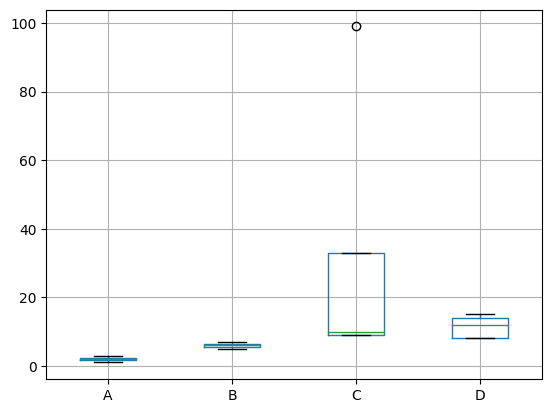

In [ ]:
boxplot = data.boxplot(column=['A', 'B', 'C', 'D'])

In [ ]:
drop_row = data.dropna(how="all")
drop_row

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,NaN,9.0,8.0
2,Singapura,NaN,7.0,NaN,14.0
3,Malaysia,2.0,NaN,9.0,8.0
4,Thailand,3.0,NaN,11.0,15.0


In [ ]:
fill_na = drop_row.fillna({'A':0, 'B':0, 'C':0, 'D':0})
fill_na

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


In [ ]:
Q1 = fill_na['C'].quantile(0.25)
Q3 = fill_na['C'].quantile(0.75)

IQR = Q3 - Q1
IQR

2.0

In [ ]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print("Batas atas:",upper_limit)
print("Batas bawah:",lower_limit)

Batas atas: 14.0
Batas bawah: 6.0


In [ ]:
fill_na[fill_na['C'] > upper_limit]

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,99.0,12.0


In [ ]:
# 1. Triming outliers
new_df = fill_na[fill_na['C'] < upper_limit]
new_df

,Negara,A,B,C,D
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,0.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0


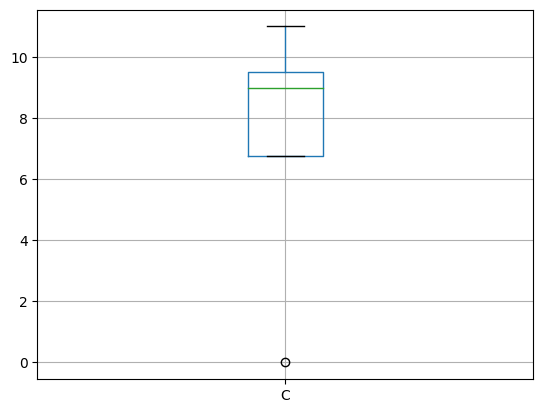

In [ ]:
boxplot = new_df.boxplot(column=['C'])



> Terdapat outlier baru, yaitu nol


In [ ]:
new_df_cap = fill_na.copy()
new_df_cap['C'] = np.where(
    new_df_cap['C'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['C'] < lower_limit,
        lower_limit,
        new_df_cap['C']
    )
)
new_df_cap

,Negara,A,B,C,D
0,Indosenia,1.0,5.0,14.0,12.0
1,Malaysia,2.0,0.0,9.0,8.0
2,Singapura,0.0,7.0,6.0,14.0
3,Malaysia,2.0,0.0,9.0,8.0
4,Thailand,3.0,0.0,11.0,15.0




> Kini tidak ada lagi outlier di kolom c



# Tambahan dari kagel EDA

In [ ]:
from ast import increment_lineno
# library
import pandas as pd
import numpy as np
# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
colum_delete = ['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size']
df = df.drop(colum_delete, axis=1)

In [ ]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price"})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
df.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
df.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG-H           10925
MPG-C           10925
Price           10925
dtype: int64

In [ ]:
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
df = df.dropna()
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [ ]:
df.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64

# Outlier

<Axes: xlabel='Price'>

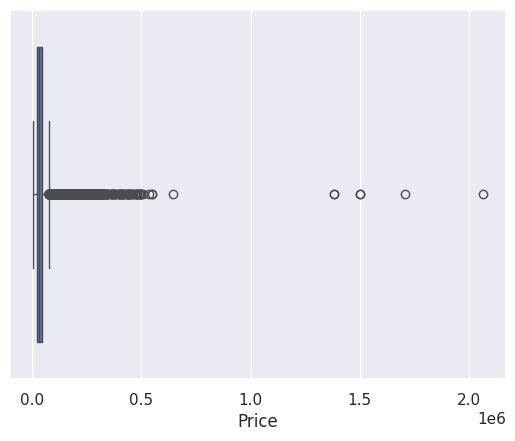

In [ ]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

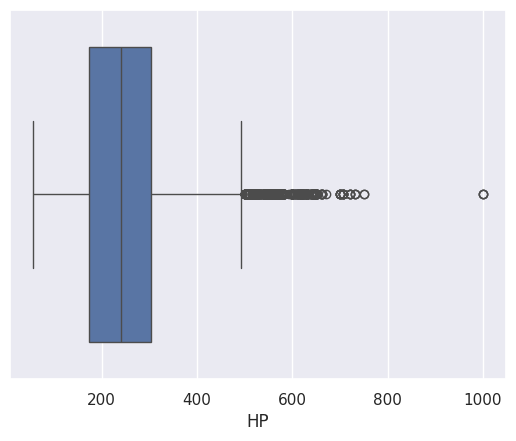

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

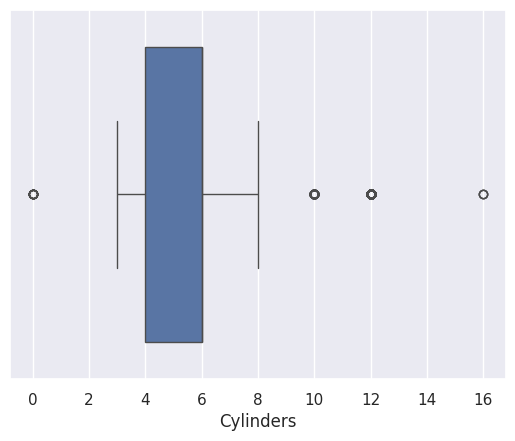

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [ ]:
# Pilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['number'])

# Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)

# Hitung interquartile range (IQR)
IQR = Q3 - Q1
IQR

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64

In [ ]:
df_clean = df[~((df_numeric < (Q1 - 1.5 * IQR)) |(df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
df_clean.shape

(9191, 10)

# Ploting

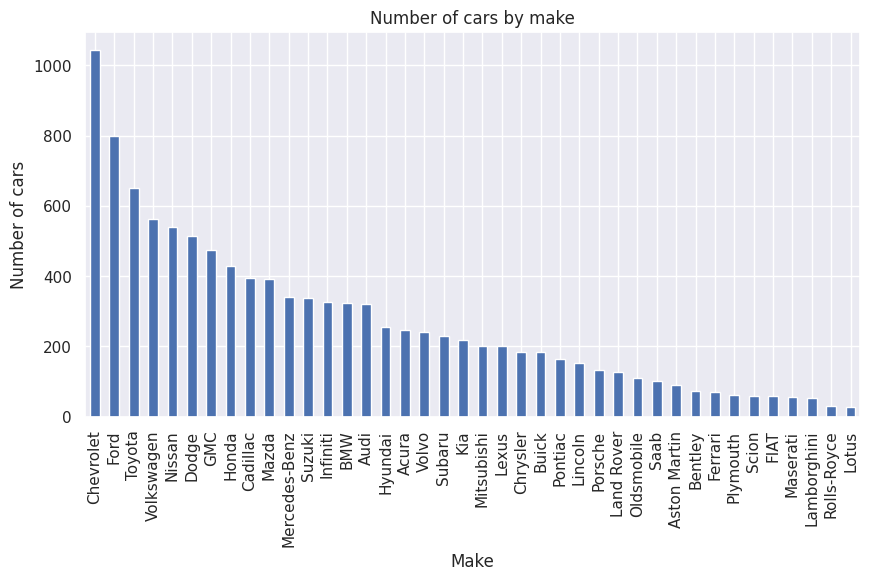

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG-H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


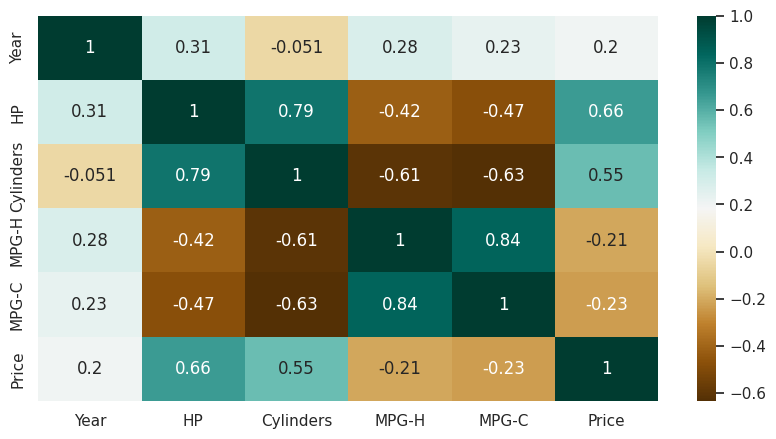

In [ ]:
plt.figure(figsize=(10,5))
c= df_numeric.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

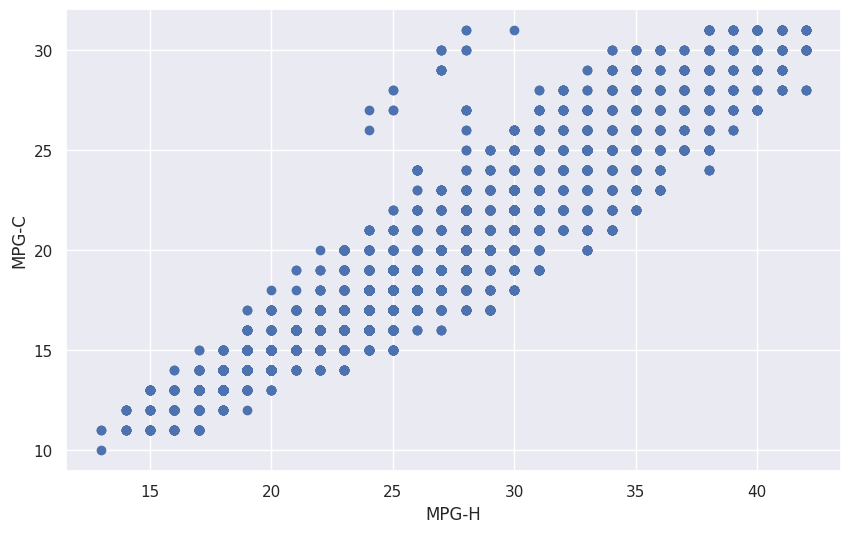

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_clean['MPG-H'], df_clean['MPG-C'])
ax.set_xlabel('MPG-H')
ax.set_ylabel('MPG-C')
plt.show()

Di praktikum kali ini sudah belajar:
* Missing value dan tekniknya
* Duplikat dan tekniknya
* typo dan tekniknya
* Outlier dan tekniknya